### MACHINE LEARNING AND LINEAR REGRESSION MODULE

##### By

##### Bernardo Vimpi

###### July 2020

#### PROJECT SCOPE AND DESCRIPTION

This project aims at using Machine Learning to predict the prices of housing price. The data being used here is not a real data. Instead, it is system generated data which. For that reason, some of the results may not make sense. However, the goal here is to focus on the methodology and Machine Learning technique. Since we are dealing with non-real data, we'll skip the Data Cleaning portion. Also, we conduct the same exercise with real data using the Boston Housing Data in a diffent projec. 

### Import the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### IMPORT DATA

In [2]:
df =pd.read_csv('USA_Housing.csv')

##### DESCIPTIVE DATA ANALYTICS

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### DATA PLOT & ANALYSIS

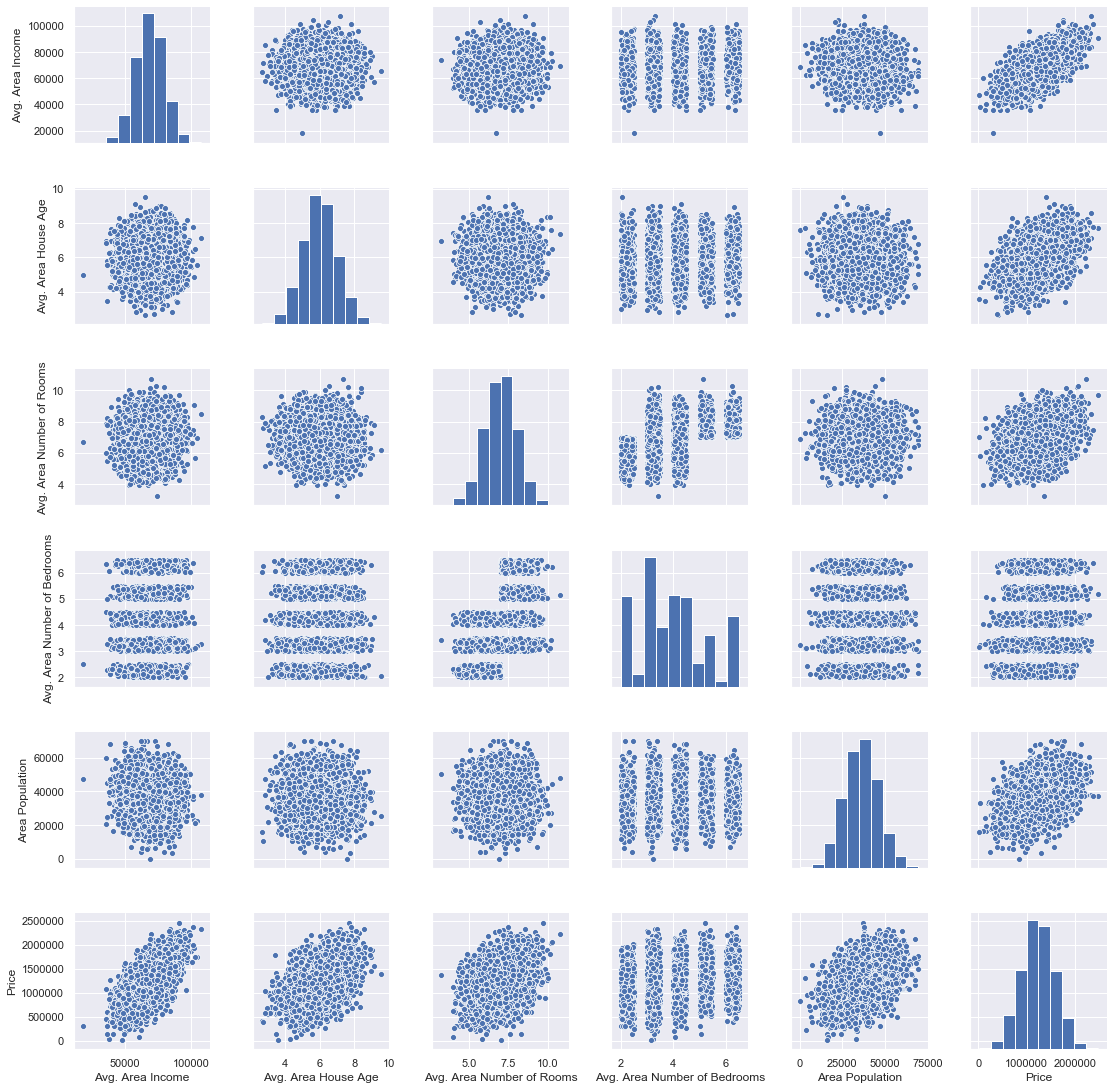

In [38]:
sns.pairplot(df)

#### DISTRIBUTION PLOT

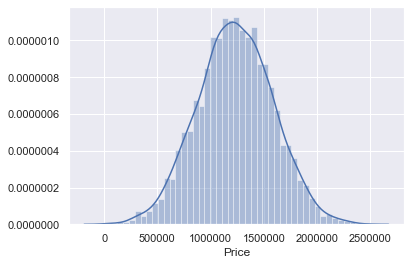

In [39]:
sns.distplot(df['Price'])

#### HEATMAP PLOT

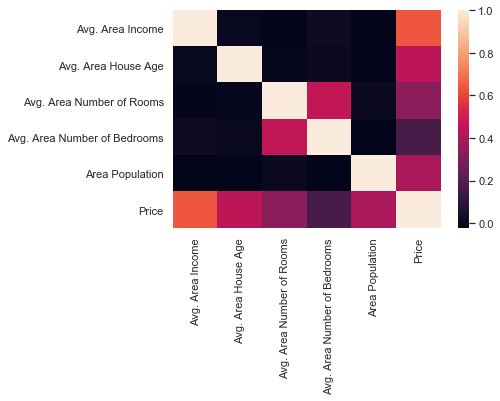

In [40]:
sns.heatmap(df.corr())

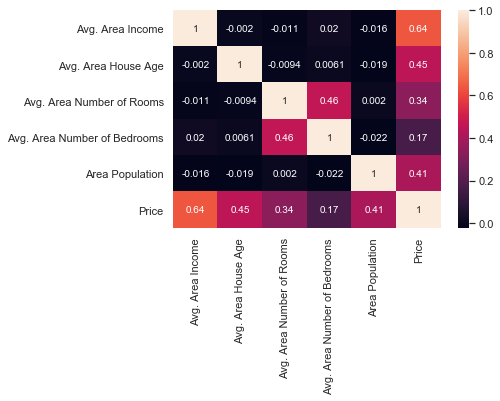

In [41]:
sns.heatmap(df.corr(), annot=True)

In [42]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### DEFINING THE FEATURES (Y and X )

In [12]:
x =df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [13]:
y = df['Price']

### DATA SPLIT:  TRAIN DAT & TEST DATA

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
 X_train, X_test, y_train, y_test = train_test_split (x, y, test_size=0.4, random_state=101)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(lm.intercept_)

-2640159.796851911


In [49]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [50]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [51]:
cdf=pd.DataFrame(lm.coef_,x.columns, columns=['Coeff'])

In [52]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


If we hold all other features fix, a 1 unit increase in, for example, Avg. Area Income is associated in increase of $21.52 in Price. The same descriptive analysis can be applied to the other features and Coefficient. However, not that this makes no much sense because this is artificially created data. But the same logic of analysis applies and makes more sense with real data. A good dataset which is based on real data is the Boston data. I use this data in another project for Machine Learning. 

### GET PREDICTIONS FROM THE TEST SET

In [53]:
predictions = lm.predict(X_test)

In [54]:
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

Above are the predicted prices of the house. However, we want to know how far off are the predictions from the test(y-test) prices. There is one quick way to analyse this via scatterplot.

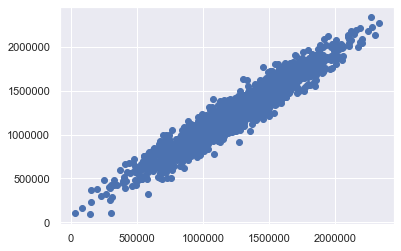

In [55]:
plt.scatter(y_test, predictions)

It seems we have done a great job with the predictions. However, let us remember that this is not real data. 

###### Histogram of the Distribution of the residuals( difference between the y_test and the predicted values)

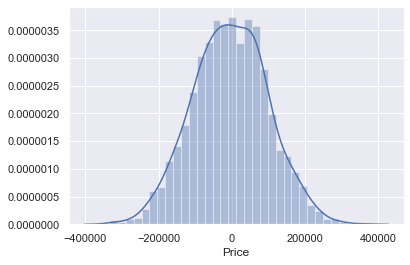

In [56]:
sns.distplot((y_test - predictions))

Our residual is normally distributed which means our model was a correct choice for the data. If it was not the case we would have checked the choice of our model.

In [57]:
from sklearn import metrics

In [58]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914957

In [59]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209501

In [60]:
# For the Root Mean Squared Error 
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291153

### Conclusion

We were able to take the data, split it into training and test sets based off the features and target. Using Sklearn, we were able to train a Linear Regression model, fit the model, check the coefficients and intercepts, make predictions using the model and then analyse the residuals. 

###### Thank you

###  Bernardo Vimpi

##### July 2020